# Imports

In [69]:
# Data Handling and Manipulation
import pandas as pd
import numpy as np
from collections import Counter

# Machine Learning Models
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier

# Model Evaluation and Metrics
from sklearn.metrics import (
    accuracy_score, 
    f1_score, 
    roc_auc_score, 
    classification_report
)

# Data Preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer

# Train-Test Split
from sklearn.model_selection import train_test_split

# NLP Libraries
import spacy
from textblob import TextBlob
from datasets import Dataset

# Visualization
import matplotlib.pyplot as plt


In [71]:
# Load processed data
df = pd.read_csv('/Users/karhin/Desktop/NYT_emotion/data/processed_dataset.csv')


In [73]:
df.head()

,emotion_0,emotion_1,emotion_2,emotion_3,emotion_4,emotion_5,emotion_6,emotion_7,emotion_8,headline_length,summary_length,clean_headline,clean_summary,clean_text,tokens,w2v_embedding,word_count,char_count,unique_word_ratio,sentiment_score
0,0,0,0,0,0,1,0,0,0,6,11,parenting lessons partial eclipse,don’t partiality maybe finally time try,parenting lessons partial eclipse don’t partia...,"['parenting', 'lessons', 'partial', 'eclipse',...",[ 0.2789099 0.35104534 0.5521695 0.729134...,10,73,1.000000,0.0000
1,0,0,0,0,0,1,0,0,0,2,8,catalonia,catalan lawmakers declared independence spain ...,catalonia catalan lawmakers declared independe...,"['catalonia', 'catalan', 'lawmakers', 'declare...",[-0.68591917 0.86837965 -0.2718815 -0.609799...,7,62,1.000000,0.0000
2,0,1,0,1,0,1,0,1,0,12,22,apple removes apps china store help internet u...,world’s valuable company appears pulled apps a...,apple removes apps china store help internet u...,"['apple', 'removes', 'apps', 'china', 'store',...",[-0.7135026 0.37232846 0.7488899 0.580454...,24,175,0.875000,0.7003
3,0,0,0,0,0,1,0,0,0,7,22,commerce secretary’s offshore ties putin ‘cron...,wilbur ross commerce secretary retained invest...,commerce secretary’s offshore ties putin ‘cron...,"['commerce', 'secretary', 's', 'offshore', 'ti...",[-8.28999802e-02 5.83586335e-01 1.88658923e-...,23,180,0.913043,0.0258
4,0,0,0,0,0,0,0,0,1,8,24,battered scarred ‘sphere’ returns 911 site,though sculpture emerged smoldering ruins larg...,battered scarred ‘sphere’ returns 911 site tho...,"['battered', 'scarred', 'sphere', 'returns', '...",[ 0.10605408 0.22822355 0.02063741 0.246064...,19,149,1.000000,-0.5859


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84194 entries, 0 to 84193
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   emotion_0          84194 non-null  int64  
 1   emotion_1          84194 non-null  int64  
 2   emotion_2          84194 non-null  int64  
 3   emotion_3          84194 non-null  int64  
 4   emotion_4          84194 non-null  int64  
 5   emotion_5          84194 non-null  int64  
 6   emotion_6          84194 non-null  int64  
 7   emotion_7          84194 non-null  int64  
 8   emotion_8          84194 non-null  int64  
 9   headline_length    84194 non-null  int64  
 10  summary_length     84194 non-null  int64  
 11  clean_headline     84194 non-null  object 
 12  clean_summary      84194 non-null  object 
 13  clean_text         84194 non-null  object 
 14  tokens             84194 non-null  object 
 15  w2v_embedding      84194 non-null  object 
 16  word_count         841

# Feature Selection

In [77]:
numerical_columns = [
    'word_count', 'char_count', 
    'unique_word_ratio', 'sentiment_score', 'headline_length', 'summary_length'
]


In [79]:
# Select numerical features including the encoded sentiment
final_features = numerical_columns 

# Define feature matrix
X = df[final_features]

# Define target columns (multi-label classification)
target_columns = ['emotion_0', 'emotion_1', 'emotion_2', 'emotion_3', 
                  'emotion_4', 'emotion_5', 'emotion_6', 'emotion_7', 'emotion_8']

# Prepare target labels
y = df[target_columns].values  # Multi-label format


In [81]:
# Split data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training Features Shape:", X_train.shape)
print("Test Features Shape:", X_test.shape)


Training Features Shape: (67355, 6)
Test Features Shape: (16839, 6)


# Random Forest Model v1 

In [87]:
# Define base classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Wrap it for multi-label classification
multi_output_rf = MultiOutputClassifier(rf_classifier)

# Train the model
multi_output_rf.fit(X_train, y_train)

# Make predictions
y_pred = multi_output_rf.predict(X_test)


In [88]:
# Generate classification report for each emotion category
for idx, col in enumerate(target_columns):
    print(f"Emotion: {col}")
    print(classification_report(y_test[:, idx], y_pred[:, idx]))


Emotion: emotion_0
              precision    recall  f1-score   support

           0       0.90      0.99      0.94     15157
           1       0.20      0.03      0.05      1682

    accuracy                           0.89     16839
   macro avg       0.55      0.51      0.50     16839
weighted avg       0.83      0.89      0.85     16839

Emotion: emotion_1
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     15250
           1       0.42      0.17      0.25      1589

    accuracy                           0.90     16839
   macro avg       0.67      0.57      0.60     16839
weighted avg       0.87      0.90      0.88     16839

Emotion: emotion_2
              precision    recall  f1-score   support

           0       0.93      0.98      0.96     15537
           1       0.32      0.09      0.13      1302

    accuracy                           0.92     16839
   macro avg       0.62      0.53      0.54     16839
weighted avg     

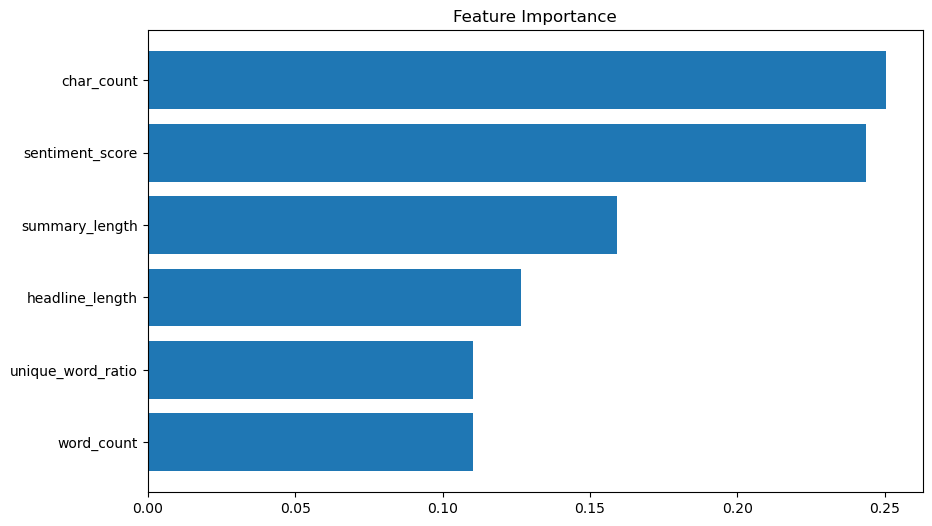

In [89]:
# Get feature importance from the first estimator
feature_importance = multi_output_rf.estimators_[0].feature_importances_
feature_names = X.columns

# Sort feature importance and plot
sorted_idx = np.argsort(feature_importance)
plt.figure(figsize=(10,6))
plt.barh(np.array(feature_names)[sorted_idx], feature_importance[sorted_idx])
plt.title("Feature Importance")
plt.show()


In [90]:
# Predict probabilities instead of class labels
y_pred_proba = multi_output_rf.predict_proba(X_test)

# Convert list of arrays to a single array
y_pred_proba = np.array([proba[:, 1] for proba in y_pred_proba]).T

# Compute ROC-AUC score for each emotion label
roc_auc_scores = roc_auc_score(y_test, y_pred_proba, average=None)

# Print per-label ROC-AUC scores
for i, col in enumerate(target_columns):
    print(f"ROC-AUC score for {col}: {roc_auc_scores[i]:.4f}")

# Compute micro and macro average ROC-AUC scores
micro_roc_auc = roc_auc_score(y_test, y_pred_proba, average='micro')
macro_roc_auc = roc_auc_score(y_test, y_pred_proba, average='macro')

print(f"Micro-average ROC-AUC: {micro_roc_auc:.4f}")
print(f"Macro-average ROC-AUC: {macro_roc_auc:.4f}")


ROC-AUC score for emotion_0: 0.5984
ROC-AUC score for emotion_1: 0.7512
ROC-AUC score for emotion_2: 0.6916
ROC-AUC score for emotion_3: 0.7203
ROC-AUC score for emotion_4: 0.6607
ROC-AUC score for emotion_5: 0.6106
ROC-AUC score for emotion_6: 0.6636
ROC-AUC score for emotion_7: 0.7963
ROC-AUC score for emotion_8: 0.5982
Micro-average ROC-AUC: 0.7495
Macro-average ROC-AUC: 0.6768


In [96]:
tfidf_vectorizer = TfidfVectorizer(max_features=10, ngram_range=(1,2))
tfidf_features = tfidf_vectorizer.fit_transform(df['clean_text'])

# Convert to DataFrame and merge
tfidf_df = pd.DataFrame(tfidf_features.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
df = pd.concat([df.reset_index(drop=True), tfidf_df.reset_index(drop=True)], axis=1)


In [98]:
df.head()

,emotion_0,emotion_1,emotion_2,emotion_3,emotion_4,emotion_5,emotion_6,emotion_7,emotion_8,headline_length,...,city,new,new york,north,one,president,said,tax,trump,york
0,0,0,0,0,0,1,0,0,0,6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,0,0,0,1,0,0,0,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,1,0,1,0,1,0,1,0,12,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0,0,0,0,1,0,0,0,7,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0,0,0,0,0,0,0,0,1,8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Random Forest Model 2 

In [101]:
def extract_text_features(text):
    sentiment = TextBlob(text).sentiment
    return pd.Series({
        'polarity': sentiment.polarity,
        'subjectivity': sentiment.subjectivity,
        'text_length': len(text.split())
    })

df[['polarity', 'subjectivity', 'text_length']] = df['clean_text'].apply(extract_text_features)


In [103]:
# Define feature columns
feature_columns = ['word_count', 'char_count', 'unique_word_ratio', 'sentiment_score',
                   'polarity', 'subjectivity', 'president','tax', 'trump', 'york']

target_columns = ['emotion_0', 'emotion_1', 'emotion_2', 'emotion_3',
                  'emotion_4', 'emotion_5', 'emotion_6', 'emotion_7', 'emotion_8']

# Standardize numerical features
scaler = StandardScaler()
df[feature_columns] = scaler.fit_transform(df[feature_columns])

# Prepare X and y
X = df[feature_columns]
y = df[target_columns]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train RandomForest model
model = RandomForestClassifier(n_estimators=200, max_depth=20, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict_proba(X_test)

# Evaluate the model
roc_auc_scores = {col: roc_auc_score(y_test[col], y_pred[i][:,1]) for i, col in enumerate(target_columns)}
micro_avg_roc_auc = roc_auc_score(y_test, np.array(y_pred)[:,:,1].T, average='micro')
macro_avg_roc_auc = roc_auc_score(y_test, np.array(y_pred)[:,:,1].T, average='macro')

print("ROC-AUC Scores per Emotion:", roc_auc_scores)
print(f"Micro-average ROC-AUC: {micro_avg_roc_auc:.4f}")
print(f"Macro-average ROC-AUC: {macro_avg_roc_auc:.4f}")

# Classification report
print("Classification Report:")
print(classification_report(y_test, model.predict(X_test)))


ROC-AUC Scores per Emotion: {'emotion_0': 0.6070368941425368, 'emotion_1': 0.7570285466681799, 'emotion_2': 0.7118704649038067, 'emotion_3': 0.7378919548477205, 'emotion_4': 0.6627280587821666, 'emotion_5': 0.6093069406818099, 'emotion_6': 0.7071289146394214, 'emotion_7': 0.7939479918058988, 'emotion_8': 0.6074576973865359}
Micro-average ROC-AUC: 0.7696
Macro-average ROC-AUC: 0.6883
Classification Report:
              precision    recall  f1-score   support

           0       0.22      0.00      0.01      1682
           1       0.46      0.09      0.15      1589
           2       0.35      0.02      0.05      1302
           3       0.34      0.05      0.09      1251
           4       0.37      0.04      0.08      1643
           5       0.51      0.31      0.39      6521
           6       0.50      0.01      0.02       656
           7       0.61      0.30      0.40      2968
           8       0.35      0.06      0.11      3773

   micro avg       0.50      0.16      0.25     2

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


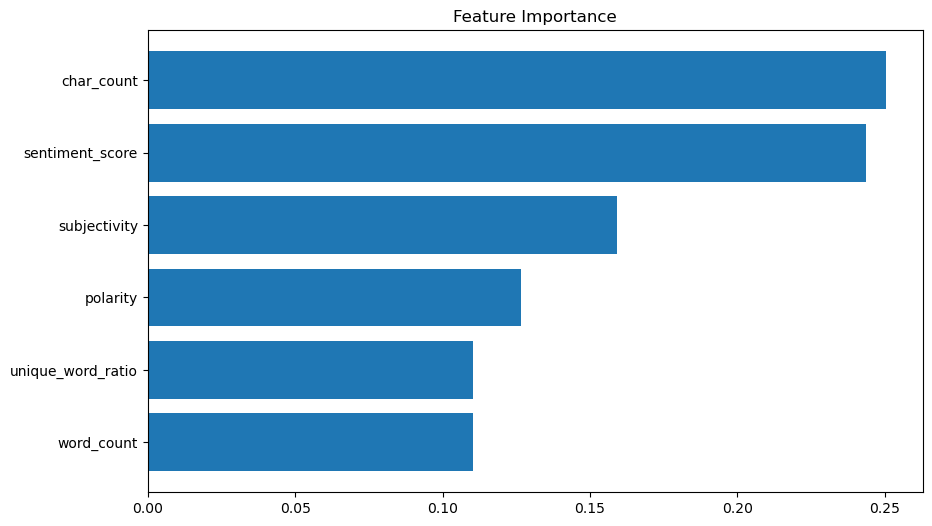

In [105]:
# Get feature importance from the first estimator
feature_importance = multi_output_rf.estimators_[0].feature_importances_
feature_names = X.columns

# Sort feature importance and plot
sorted_idx = np.argsort(feature_importance)
plt.figure(figsize=(10,6))
plt.barh(np.array(feature_names)[sorted_idx], feature_importance[sorted_idx])
plt.title("Feature Importance")
plt.show()


# XgBoost Model 

In [108]:
# Wrap XGBoost model in MultiOutputClassifier
xgb_base_model = xgb.XGBClassifier(n_estimators=200, max_depth=10, learning_rate=0.05, random_state=42)
multi_xgb_model = MultiOutputClassifier(xgb_base_model)

# Train the model
multi_xgb_model.fit(X_train, y_train)

# Predictions
y_pred_xgb = multi_xgb_model.predict_proba(X_test)

# Evaluate the model
roc_auc_scores_xgb = {col: roc_auc_score(y_test[col], [pred[:, 1] for pred in y_pred_xgb][i]) for i, col in enumerate(target_columns)}

micro_avg_roc_auc_xgb = roc_auc_score(y_test, np.array([pred[:, 1] for pred in y_pred_xgb]).T, average='micro')
macro_avg_roc_auc_xgb = roc_auc_score(y_test, np.array([pred[:, 1] for pred in y_pred_xgb]).T, average='macro')

print("XGBoost ROC-AUC Scores per Emotion:", roc_auc_scores_xgb)
print(f"XGBoost Micro-average ROC-AUC: {micro_avg_roc_auc_xgb:.4f}")
print(f"XGBoost Macro-average ROC-AUC: {macro_avg_roc_auc_xgb:.4f}")

# Classification report
print("XGBoost Classification Report:")
print(classification_report(y_test, multi_xgb_model.predict(X_test)))




XGBoost ROC-AUC Scores per Emotion: {'emotion_0': 0.5992474172625372, 'emotion_1': 0.7683633793807838, 'emotion_2': 0.7125080836221983, 'emotion_3': 0.7558127478002201, 'emotion_4': 0.6552743282059843, 'emotion_5': 0.6041525108065584, 'emotion_6': 0.7045853127265438, 'emotion_7': 0.7920259569257819, 'emotion_8': 0.6081577965264242}
XGBoost Micro-average ROC-AUC: 0.7765
XGBoost Macro-average ROC-AUC: 0.6889
XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.08      0.00      0.00      1682
           1       0.47      0.05      0.09      1589
           2       0.37      0.01      0.02      1302
           3       0.34      0.04      0.07      1251
           4       0.37      0.02      0.05      1643
           5       0.52      0.22      0.31      6521
           6       0.44      0.01      0.01       656
           7       0.62      0.23      0.33      2968
           8       0.35      0.02      0.04      3773

   micro avg     

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [110]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train XGBoost models for each emotion individually
xgb_models = {}
roc_auc_scores_xgb = {}

for i, col in enumerate(target_columns):
    scale_pos_weight = (y_train.shape[0] - y_train[col].sum()) / y_train[col].sum()
    
    xgb_model = xgb.XGBClassifier(
        n_estimators=200, 
        max_depth=10, 
        learning_rate=0.05, 
        random_state=42, 
        scale_pos_weight=scale_pos_weight
    )
    
    print(f"Training XGBoost model for {col} with scale_pos_weight={scale_pos_weight:.2f}")
    xgb_model.fit(X_train, y_train[col])
    xgb_models[col] = xgb_model

    # Predictions and evaluation
    y_pred_xgb = xgb_model.predict_proba(X_test)[:, 1]
    roc_auc_scores_xgb[col] = roc_auc_score(y_test[col], y_pred_xgb)

# Micro and Macro average ROC-AUC
micro_avg_roc_auc_xgb = roc_auc_score(y_test, np.array([xgb_models[col].predict_proba(X_test)[:,1] for col in target_columns]).T, average='micro')
macro_avg_roc_auc_xgb = np.mean(list(roc_auc_scores_xgb.values()))

print("XGBoost ROC-AUC Scores per Emotion:", roc_auc_scores_xgb)
print(f"XGBoost Micro-average ROC-AUC: {micro_avg_roc_auc_xgb:.4f}")
print(f"XGBoost Macro-average ROC-AUC: {macro_avg_roc_auc_xgb:.4f}")




Training XGBoost model for emotion_0 with scale_pos_weight=9.41
Training XGBoost model for emotion_1 with scale_pos_weight=9.63
Training XGBoost model for emotion_2 with scale_pos_weight=11.55
Training XGBoost model for emotion_3 with scale_pos_weight=12.26
Training XGBoost model for emotion_4 with scale_pos_weight=9.08
Training XGBoost model for emotion_5 with scale_pos_weight=1.60
Training XGBoost model for emotion_6 with scale_pos_weight=26.03
Training XGBoost model for emotion_7 with scale_pos_weight=4.75
Training XGBoost model for emotion_8 with scale_pos_weight=3.43
XGBoost ROC-AUC Scores per Emotion: {'emotion_0': 0.5981886810244608, 'emotion_1': 0.7571940492525457, 'emotion_2': 0.7096884924713189, 'emotion_3': 0.737825623514532, 'emotion_4': 0.6557516577463685, 'emotion_5': 0.6029854521329823, 'emotion_6': 0.699940929053825, 'emotion_7': 0.7896459089441972, 'emotion_8': 0.6080215638689572}
XGBoost Micro-average ROC-AUC: 0.7064
XGBoost Macro-average ROC-AUC: 0.6844


# Inserting Chi-square Features/ with weighting 

In [113]:
chi_square_features = [
    'world series', 'aaron judge', 'north korea', 'pga championship', 'home run',
    'star trek', 'puerto rico', 'home runs', 'football game', 'wildcard game',
    'kim jongun', 'missile test', 'south korea', 'united states', 'ballistic missile',
    'nuclear deal', 'couple met', 'met years', 'new york', 'mutual friend', 'president trump',
    'roy moore', 'trump says', 'mr moore', 'donald trump', 'sexual misconduct',
    'white house', 'hurricane maria', 'death toll', 'police said', 'las vegas shooting',
    'homes sale', 'sale new york', 'briefing need', 'week properties'
]

# Function to create new features based on chi-square terms
def add_chi_square_features(df, features):
    for term in features:
        df[term] = df['clean_text'].apply(lambda x: 1 if term in x.lower() else 0)
    return df

# Apply the function to the dataset
df = add_chi_square_features(df, chi_square_features)

# Update feature columns list
feature_columns.extend(chi_square_features)

In [115]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train XGBoost models for each emotion individually
xgb_models = {}
roc_auc_scores_xgb = {}

for i, col in enumerate(target_columns):
    scale_pos_weight = (y_train.shape[0] - y_train[col].sum()) / y_train[col].sum()
    
    xgb_model = xgb.XGBClassifier(
        n_estimators=200, 
        max_depth=10, 
        learning_rate=0.05, 
        random_state=42, 
        scale_pos_weight=scale_pos_weight
    )
    
    print(f"Training XGBoost model for {col} with scale_pos_weight={scale_pos_weight:.2f}")
    xgb_model.fit(X_train, y_train[col])
    xgb_models[col] = xgb_model

    # Predictions and evaluation
    y_pred_xgb = xgb_model.predict_proba(X_test)[:, 1]
    roc_auc_scores_xgb[col] = roc_auc_score(y_test[col], y_pred_xgb)

# Micro and Macro average ROC-AUC
micro_avg_roc_auc_xgb = roc_auc_score(y_test, np.array([xgb_models[col].predict_proba(X_test)[:,1] for col in target_columns]).T, average='micro')
macro_avg_roc_auc_xgb = np.mean(list(roc_auc_scores_xgb.values()))

print("XGBoost ROC-AUC Scores per Emotion:", roc_auc_scores_xgb)
print(f"XGBoost Micro-average ROC-AUC: {micro_avg_roc_auc_xgb:.4f}")
print(f"XGBoost Macro-average ROC-AUC: {macro_avg_roc_auc_xgb:.4f}")




Training XGBoost model for emotion_0 with scale_pos_weight=9.41
Training XGBoost model for emotion_1 with scale_pos_weight=9.63
Training XGBoost model for emotion_2 with scale_pos_weight=11.55
Training XGBoost model for emotion_3 with scale_pos_weight=12.26
Training XGBoost model for emotion_4 with scale_pos_weight=9.08
Training XGBoost model for emotion_5 with scale_pos_weight=1.60
Training XGBoost model for emotion_6 with scale_pos_weight=26.03
Training XGBoost model for emotion_7 with scale_pos_weight=4.75
Training XGBoost model for emotion_8 with scale_pos_weight=3.43
XGBoost ROC-AUC Scores per Emotion: {'emotion_0': 0.5981886810244608, 'emotion_1': 0.7571940492525457, 'emotion_2': 0.7096884924713189, 'emotion_3': 0.737825623514532, 'emotion_4': 0.6557516577463685, 'emotion_5': 0.6029854521329823, 'emotion_6': 0.699940929053825, 'emotion_7': 0.7896459089441972, 'emotion_8': 0.6080215638689572}
XGBoost Micro-average ROC-AUC: 0.7064
XGBoost Macro-average ROC-AUC: 0.6844


#  Inserting Chi-square Features/ without weighting 

In [118]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train XGBoost models for each emotion individually
xgb_models = {}
roc_auc_scores_xgb = {}

for i, col in enumerate(target_columns):
    scale_pos_weight = (y_train.shape[0] - y_train[col].sum()) / y_train[col].sum()
    
    xgb_model = xgb.XGBClassifier(
        n_estimators=200, 
        max_depth=10, 
        learning_rate=0.05, 
        random_state=42, 
    )
    
    xgb_model.fit(X_train, y_train[col])
    xgb_models[col] = xgb_model

    # Predictions and evaluation
    y_pred_xgb = xgb_model.predict_proba(X_test)[:, 1]
    roc_auc_scores_xgb[col] = roc_auc_score(y_test[col], y_pred_xgb)

# Micro and Macro average ROC-AUC
micro_avg_roc_auc_xgb = roc_auc_score(y_test, np.array([xgb_models[col].predict_proba(X_test)[:,1] for col in target_columns]).T, average='micro')
macro_avg_roc_auc_xgb = np.mean(list(roc_auc_scores_xgb.values()))

print("XGBoost ROC-AUC Scores per Emotion:", roc_auc_scores_xgb)
print(f"XGBoost Micro-average ROC-AUC: {micro_avg_roc_auc_xgb:.4f}")
print(f"XGBoost Macro-average ROC-AUC: {macro_avg_roc_auc_xgb:.4f}")




XGBoost ROC-AUC Scores per Emotion: {'emotion_0': 0.5992474172625372, 'emotion_1': 0.7683633793807838, 'emotion_2': 0.7125080836221983, 'emotion_3': 0.7558127478002201, 'emotion_4': 0.6552743282059843, 'emotion_5': 0.6041525108065584, 'emotion_6': 0.7045853127265438, 'emotion_7': 0.7920259569257819, 'emotion_8': 0.6081577965264242}
XGBoost Micro-average ROC-AUC: 0.7765
XGBoost Macro-average ROC-AUC: 0.6889
